# Data Loader
The purpose of this notebook is to build a pipeline to efficiently load the train and test images for later use.
We utilize the PyTorch capabilities where ever possible.

In [1]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torchvision.io import read_image
import helpers

CONFIG = helpers.get_config()
torch.manual_seed(CONFIG['RANDOM_STATE'])

In [3]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [4]:
training_data = CustomImageDataset(annotations_file=CONFIG['TRAIN_IMAGES'], img_dir=CONFIG['FLATTENED_FOLDER'])
test_data = CustomImageDataset(annotations_file=CONFIG['TEST_IMAGES'], img_dir=CONFIG['FLATTENED_FOLDER'])

In [5]:
train_dataloader = DataLoader(training_data, batch_size=CONFIG['BATCH_SIZE'], shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=CONFIG['BATCH_SIZE'], shuffle=True)

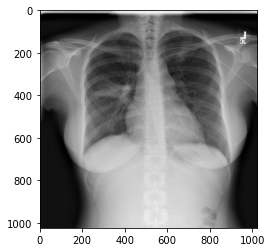

Label: Infiltration


In [6]:
# Example image.
train_features, train_labels = next(iter(train_dataloader))
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")